In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Read in Data

In [2]:
df = pd.read_excel('SensorData_Nov3.xlsx')

In [3]:
df.head()

,Unnamed: 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,d_Sensor 1,d_Sensor 2,d_Sensor 3,d_Sensor 4,timeTracker
0,0,0.469091,0.454545,0.507879,0.507879,0.000000,0,0.000000,0.000000,1.572816e+09
1,1,0.469091,0.454545,0.507879,0.510303,0.000000,0,0.000000,0.118445,1.572816e+09
2,2,0.462626,0.454545,0.501414,0.506250,-0.180967,0,-0.180967,-0.059827,1.572816e+09
3,3,0.456888,0.454545,0.504283,0.507888,-0.317444,0,-0.017527,0.022958,1.572816e+09
4,4,0.451413,0.454545,0.506007,0.509853,-0.368020,0,0.040091,0.069086,1.572816e+09


### EDA

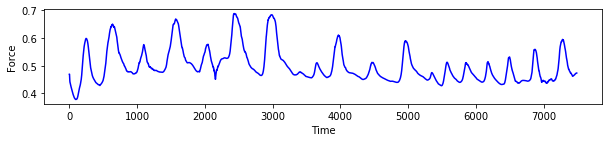

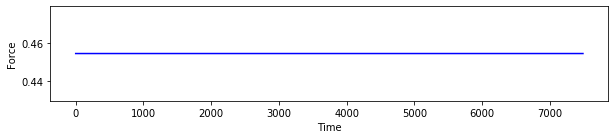

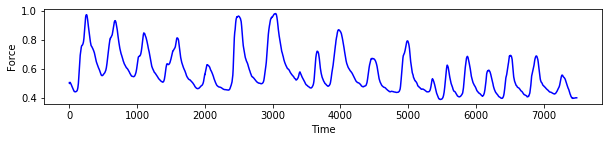

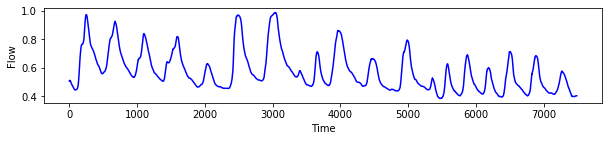

In [4]:
fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,1)
plt.plot(df['Sensor 1'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,2)
plt.plot(df['Sensor 2'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,3)
plt.plot(df['Sensor 3'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,4)
plt.plot(df['Sensor 4'], 'b')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.show()


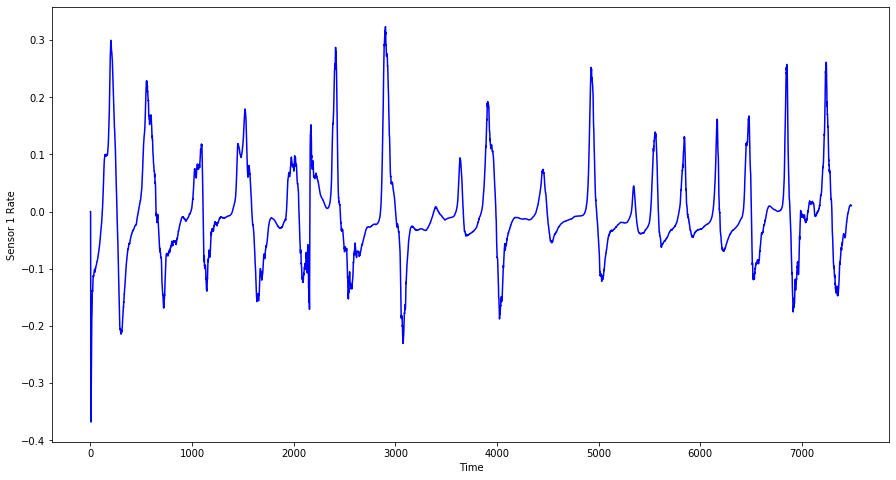

In [5]:
fig = plt.figure(figsize = (15, 8))
plt.plot(df['d_Sensor 1'], 'b')
plt.xlabel('Time')
plt.ylabel('Sensor 1 Rate')
plt.show()

In [7]:
def simpleKalman(x, mea_e, est_e, q):
    
    y = np.zeros(len(x))
    err_measure = mea_e
    err_estimate = est_e
    last_estimate = x[0]
    y[0] = last_estimate
    
    for i in range(1, len(x)):
        
        kalman_gain = err_estimate / (err_estimate + err_measure)
        current_estimate = last_estimate + kalman_gain * (x[i] - last_estimate)
        err_estimate =  (1.0 - kalman_gain)*err_estimate + abs(last_estimate-current_estimate)*q
        y[i] = current_estimate
        last_estimate = current_estimate
        
    return y

# q is noise amp
# est_e - error in the model


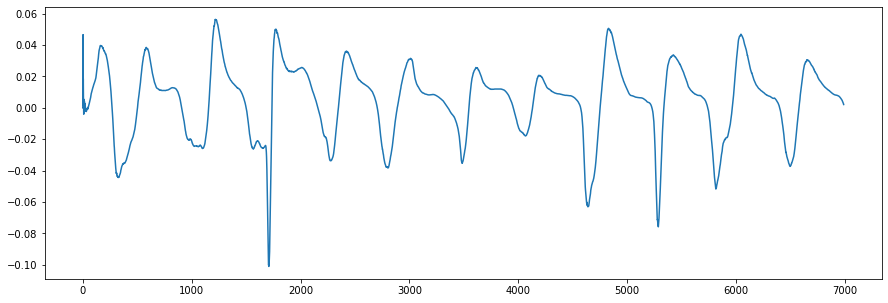

In [60]:
fig = plt.figure(figsize = (15, 5))
plt.plot(simpleKalman(df['d_Sensor 3']*-1, 0.07, 0.07, 0.08))

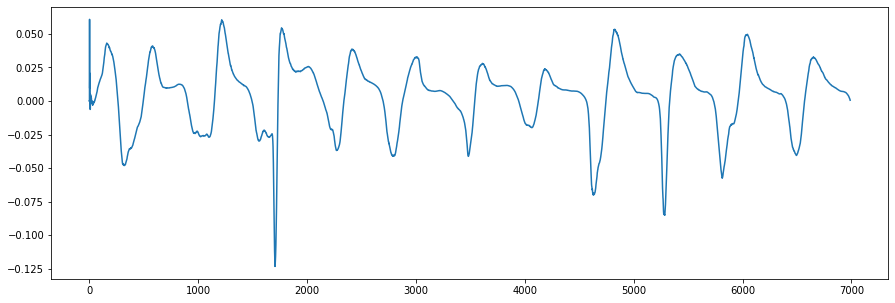

In [61]:
fig = plt.figure(figsize = (15, 5))
plt.plot(simpleKalman(df['d_Sensor 3']*-1, 0.05, 0.8, 0.08))

In [62]:
flow = pd.read_csv('DataLog_4.csv')

In [63]:
flow.head()

,Sample #,Date,Time,Flow lin [slm]
0,330605,10/30/2019,16:06:20.7320,-0.033
1,330606,10/30/2019,16:06:20.7326,-0.033
2,330607,10/30/2019,16:06:20.7331,-0.033
3,330608,10/30/2019,16:06:20.7337,-0.033
4,330609,10/30/2019,16:06:20.7342,-0.033


1572465985.200605
60.00937557220459
16:06:25.2008
16:07:25.2037


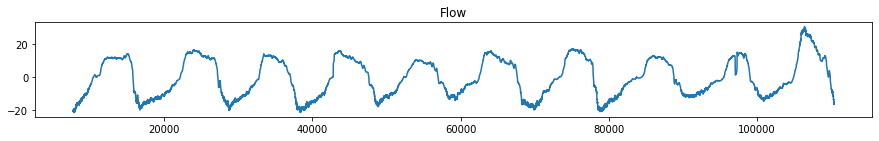

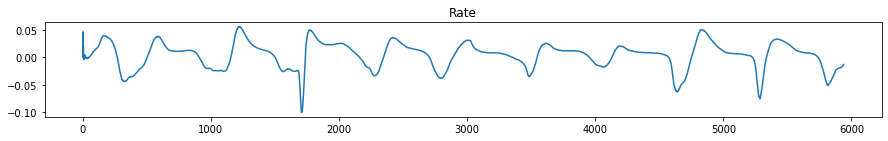

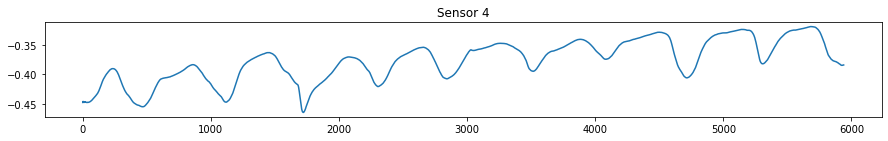

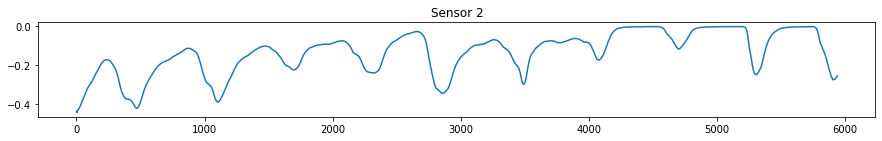

In [64]:
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.title('Flow')
plt.plot(flow['Flow lin [slm]'][7725:110390])

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.title('Rate')
plt.plot(simpleKalman(df['d_Sensor 3']*-1, 0.07, 0.07, 0.08)[:5940])

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.title('Sensor 4')
plt.plot(df['Sensor 4'][:5940] * -1)

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.title('Sensor 2')
plt.plot(df['Sensor 2'][:5940] * -1)

print(df['timeTracker'][0])
print(df['timeTracker'][5940])
print(flow['Time'][7725])
print(flow['Time'][110390])

In [68]:
df['timeTracker'][5940]

60.00937557220459

In [42]:
flow['Time'][len(flow)-1:]

141604    16:07:43.1917
Name: Time, dtype: object

In [98]:
flow['Time'][7725]

'16:06:25.2008'

In [142]:
flow['Time'][113869]

'16:07:27.2004'